In [7]:
import numpy as np
import matplotlib.pyplot as plt
import random

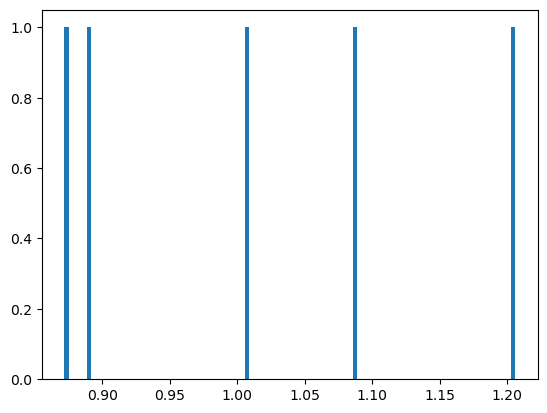

In [38]:
measurements = []
N = 5
for i in range(N):
    measurements.append(random.gauss(1,0.2)) #numbers from a given distribution with mu=1, sigma=0.2
plt.hist(measurements,100)
plt.show()

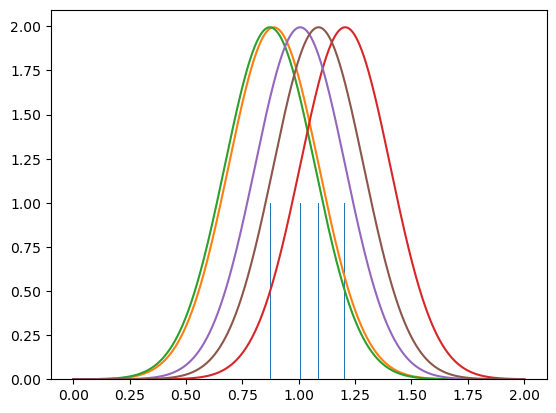

In [39]:
x = np.linspace(0,2,10000)

def gaussian_analytical(mu,sigma):
    return (1.0 / (np.sqrt(2.0 * np.pi) * sigma))*np.exp(-(x-mu)**2 /(2*sigma**2)) #analytical gaussian function

def gaussian_probability(x, mu,sigma):
    return (1.0 / (np.sqrt(2.0 * np.pi) * sigma))*np.exp(-(x-mu)**2 /(2*sigma**2)) #analytical gaussian function

plt.hist(measurements,100) #density=True

for x_i in measurements: 
    plt.plot(x,gaussian_analytical(x_i,0.2))

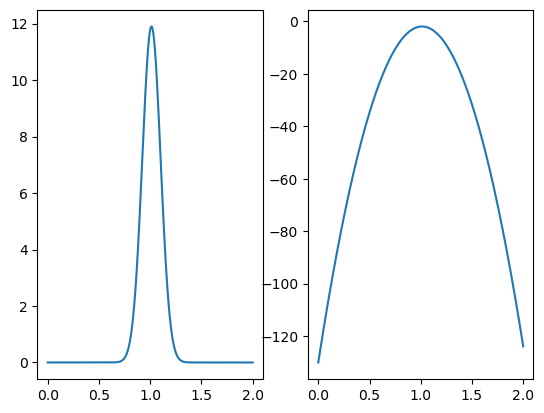

numerical MLE for the true value is:  1.0123012301230123
analytical MLE for the true value is:  1.0123119545015138


In [42]:
#MLE approach to get the best estimation on mu

x = np.linspace(0,2,10000)

def likelihood_gaus(measurements, mu_parameter, sigma_parameter):
    L = 1.
    for x in measurements: L = L*gaussian_probability(x,mu_parameter, sigma_parameter)
    return L

def log_likelihood_gaus(measurements, mu_parameter, sigma_parameter): #is it usefull to use this? 
    log_L = 0
    for x in measurements: log_L += -((x-mu_parameter)/sigma_parameter)**2
    return log_L #return np.log(likelihood_gaus(measurements, mu_parameter, sigma_parameter))

likelihood_gaus = likelihood_gaus(measurements, x, 0.2)
log_likelihood_gaus = log_likelihood_gaus(measurements, x, 0.2)

fig, (ax1, ax2) = plt.subplots(1, 2)
#fig.suptitle('Horizontally stacked subplots')
ax1.plot(x, likelihood_gaus)
ax2.plot(x, log_likelihood_gaus)
plt.show()

#to find the maximum likelihood estimator NUMERICALLY
max_index = np.argsort(log_likelihood_gaus)[::-1][0] 
mu = x[max_index]
print("numerical MLE for the true value is: ",mu) 

#we can compare it with the mean (ANALYTICAL MLE):
print("analytical MLE for the true value is: ",np.mean(measurements)) 

In [43]:
#to find the error we use Fisher matrix
#we need second derivative of log_L computed in the real value estimator computed above

dx = np.diff(x)[0]
der_log_L = np.diff(log_likelihood_gaus)/dx #derivative of function log_L
der2_log_L = np.diff(der_log_L)/dx #second derivative of function log L
#if we want to plot derivative and second derivative of log function
#x = np.delete(x, len(x)-1)
#plt.plot(x,der_log_L)
#x = np.delete(x, len(x)-1)
#plt.plot(x,der2_log_L)
F_11 = -der2_log_L[max_index] #element of Fisher matrix
sigma_mu = np.sqrt(1/F_11)
print("numerical MLE for the UNCERTANTY on mu is: ",sigma_mu) 
#we can compare it with the mean (ANALYTICAL MLE):
print("analytical MLE for the uncertanty on mu is: ",0.2/np.sqrt(N)) 

numerical MLE for the UNCERTANTY on mu is:  0.06324555320352186
analytical MLE for the uncertanty on mu is:  0.08944271909999159


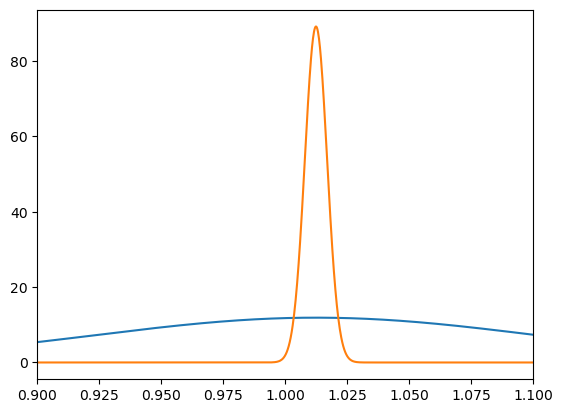

In [41]:
plt.plot(x, likelihood_gaus)
plt.plot(x, gaussian_analytical(mu,sigma_mu))
plt.xlim(0.9,1.1)
plt.show()

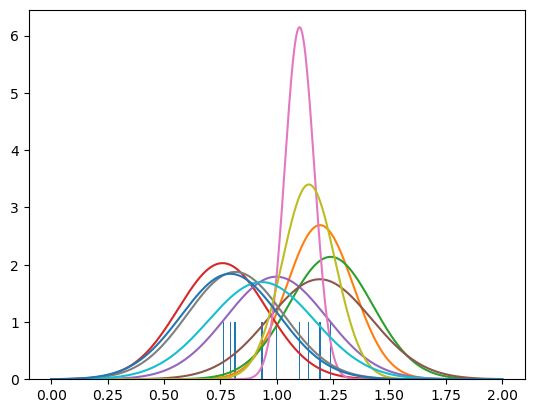

In [57]:
N = 10 #numbers of measurements with the telescope: each measurment consists of one data from underlying gaussian distribution with some sigma. 
errors = []
for i in range(N):
    errors.append(random.gauss(0.2,0.05)) #errors from a given distribution with mu=0.2, sigma=0.05

measurements = []
for i in range(N):
    measurements.append(random.gauss(1,errors[i])) #numbers from a given distribution with mu=1, sigma=0.2
    
plt.hist(measurements,100) #density=True

for i in range(N): plt.plot(x,gaussian_analytical(measurements[i],errors[i]))

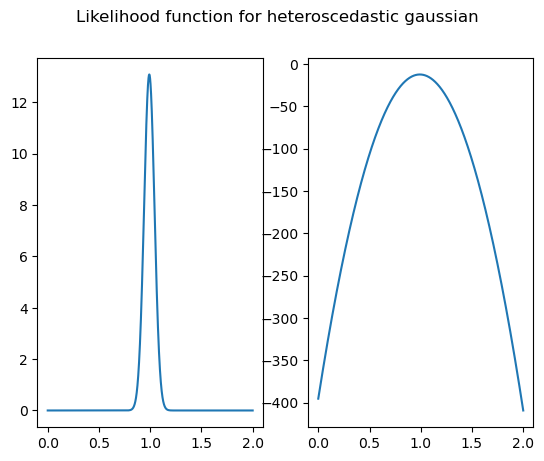

numerical MLE for the true value is:  0.9908990899089909
analytical MLE for the true value is:  1.017118182750648


In [58]:
#heteroscedastic gaussian
#add normally distributed errors to each measure
errors = []
for i in range(N):
    errors.append(random.gauss(0.2,0.05)) #errors from a given distribution with mu=0.2, sigma=0.05


def likelihood_gaus_het(measurements, mu_parameter, errors):
    L = 1.
    for i in range(len(measurements)): L = L*gaussian_probability(measurements[i],mu_parameter, errors[i])
    return L

def log_likelihood_gaus_het(measurements, mu_parameter, sigma_parameter): #is it usefull to use this? 
    log_L = 0
    for i in range(len(measurements)): log_L += -((measurements[i]-mu_parameter)/errors[i])**2
    return log_L #return np.log(likelihood_gaus(measurements, mu_parameter, sigma_parameter))


likelihood_gaus_het = likelihood_gaus_het(measurements, x, errors)
log_likelihood_gaus_het = log_likelihood_gaus_het(measurements, x, errors)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Likelihood function for heteroscedastic gaussian')
ax1.plot(x, likelihood_gaus_het)
ax2.plot(x, log_likelihood_gaus_het)
plt.show()

#to find the maximum likelihood estimator NUMERICALLY
max_index = np.argsort(log_likelihood_gaus_het)[::-1][0] 
mu = x[max_index]
print("numerical MLE for the true value is: ",mu) 

#we can compare it with the mean (ANALYTICAL MLE):
print("analytical MLE for the true value is: ",np.mean(measurements)) 

In [59]:
#to find the error we use Fisher matrix
#we need second derivative of log_L computed in the real value estimator computed above

dx = np.diff(x)[0]
der_log_L = np.diff(log_likelihood_gaus)/dx #derivative of function log_L
der2_log_L = np.diff(der_log_L)/dx #second derivative of function log L
#if we want to plot derivative and second derivative of log function
#x = np.delete(x, len(x)-1)
#plt.plot(x,der_log_L)
#x = np.delete(x, len(x)-1)
#plt.plot(x,der2_log_L)
F_11 = -der2_log_L[max_index] #element of Fisher matrix
sigma_mu = np.sqrt(1/F_11)
print("numerical MLE for the UNCERTANTY on mu is: ",sigma_mu) 
#we can compare it with the mean (ANALYTICAL MLE):
sum=0
for i in range(N): sum += errors[i]**-2
print("analytical MLE for the uncertanty on mu is: ",sum**-0.5) 

numerical MLE for the UNCERTANTY on mu is:  0.06324555320352186
analytical MLE for the uncertanty on mu is:  0.05064392749513467
